<a href="https://colab.research.google.com/github/aghapygad336/Canny-Edge-Computer-Vision/blob/master/final_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import skimage
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm



In [0]:
def convert_bw(img_colored):
    r, g, b = img_colored[:,:,0], img_colored[:,:,1], img_colored[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray


In [0]:
def load_data(img):    
    imgs = []
    img = mpimg.imread(img)
    img = convert_bw(img)
    imgs.append(img)
    return imgs

In [0]:
def visualize(images, cols = 1, titles = None):
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images*100 + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
    plt.show()

In [0]:
from scipy import ndimage
from scipy.ndimage.filters import convolve
from scipy import misc
import numpy as np

In [0]:
def gaussian_kernel(size, sigma):
    size = int(size) // 2
    axis= np.mgrid[-size:size+1, -size:size+1]
    x=axis[0]
    y=axis[1]
    normal=1/ (2.0 * np.pi * sigma**2)
    mask =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return mask 

In [0]:
def prewitt(img):
    prewitt_xDet = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    prewitt_X = ndimage.filters.convolve(img, prewitt_xDet)
    return prewitt_X

In [0]:
def sobel(img):
    sobel_yDet = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    Iy = ndimage.filters.convolve(img, sobel_yDet)
    return Iy

In [0]:
def second_derivative(img):#Prewitt-> X , Sobel ->y
    Ix=prewitt(img)
    Iy=sobel(img)
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    return (G, theta)         


In [0]:
def non_max_suppression(img, D):
      M, N = img.shape
      Z = np.zeros((M,N), dtype=np.int32)
      angle = D * 180. / np.pi
      angle[angle < 0] += 180
      for i in range(1,M-1):
          for j in range(1,N-1):
              try:
                  q = 255
                  r = 255
                  #angle 0
                  if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                      q = img[i, j+1]
                      r = img[i, j-1]
                  #angle 45
                  elif (22.5 <= angle[i,j] < 67.5):
                      q = img[i+1, j-1]
                      r = img[i-1, j+1]
                  #angle 90
                  elif (67.5 <= angle[i,j] < 112.5):
                      q = img[i+1, j]
                      r = img[i-1, j]
                  #angle 135
                  elif (112.5 <= angle[i,j] < 157.5):
                      q = img[i-1, j-1]
                      r = img[i+1, j+1]
                  if (img[i,j] >= q) and (img[i,j] >= r):
                      Z[i,j] = img[i,j]
                  else:
                      Z[i,j] = 0
              except IndexError as e:
                  pass

      return Z 

In [0]:
def double_threshold(img,highThreshold,lowThreshold,weak_pixel,strong_pixel):
    highThreshold = img.max() * highThreshold;
    lowThreshold = highThreshold * lowThreshold;
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    weak = np.int32(weak_pixel)
    strong = np.int32(strong_pixel)
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    return (res)

In [0]:
def Edge_Linking(weak_pixel,strong_pixel, img):
        M, N = img.shape
        weak = weak_pixel
        strong = strong_pixel
        for i in range(1, M-1):
            for j in range(1, N-1):
                if (img[i,j] == weak):
                    try:
                        if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                            or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                            or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                            img[i, j] = strong
                        else:
                            img[i, j] = 0
                    except IndexError as e:
                        pass

        return img  

In [0]:
def Canny(img):
    imgs_final = []
    img_b
    sigma=1
    kernel_size=3
    lowThreshold=0.05
    highThreshold=0.1
    weak_pixel=60
    strong_pixel=255
    for i, img in enumerate(img):    
        img_smoothed = convolve(img, gaussian_kernel(kernel_size, sigma))
        gradientMat, thetaMat = second_derivative(img_smoothed)
        nonMaxImg = non_max_suppression(gradientMat, thetaMat)
        thresholdImg = double_threshold(nonMaxImg,highThreshold,lowThreshold,weak_pixel,strong_pixel)
        img_final = Edge_Linking(weak_pixel,strong_pixel,thresholdImg)
        imgs_final.append(img_final)

    return imgs_final

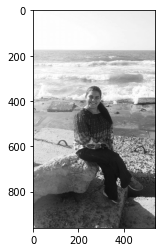

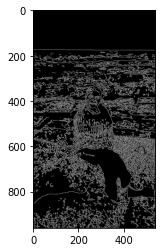

In [0]:
img="/content/20232867_1491664330892480_2055147312052354719_o.jpg"
img_b = load_data(img)
visualize(img_b)
imgs_final = Canny(img_b)
visualize(imgs_final)
